In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
df=pd.read_csv('titanic_toy.csv')

In [37]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [39]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [40]:
X=df.drop(columns=['Survived'])
y=df['Survived']


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [43]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [44]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)

In [45]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
442,25.0,7.7750,1,25.0,7.7750,25.0,7.7750
605,36.0,15.5500,1,36.0,15.5500,36.0,15.5500
638,41.0,39.6875,5,41.0,39.6875,41.0,39.6875
796,49.0,25.9292,0,49.0,25.9292,49.0,25.9292
735,28.5,16.1000,0,28.5,16.1000,28.5,16.1000


In [46]:
print('Original Age variable variance' ,X_train['Age'].var())
print('Original Fare variable variance' ,X_train['Fare'].var())

print('Age Variance after mean imputation' ,X_train['Age_mean'].var())
print('Fare Variance after mean imputation' ,X_train['Fare_mean'].var())

print('Age Variance after median imputation' ,X_train['Age_median'].var())
print('Fare Variance after median imputation' ,X_train['Fare_median'].var())



Original Age variable variance 204.3495133904614
Original Fare variable variance 2448.197913706318
Age Variance after mean imputation 161.81262452718673
Fare Variance after mean imputation 2324.2385256705547
Age Variance after median imputation 161.9895663346054
Fare Variance after median imputation 2340.0910219753637


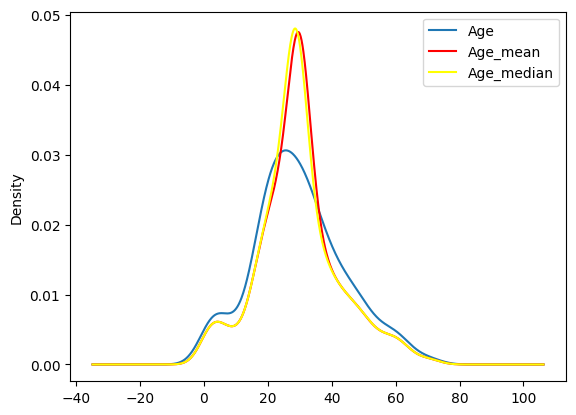

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='yellow')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

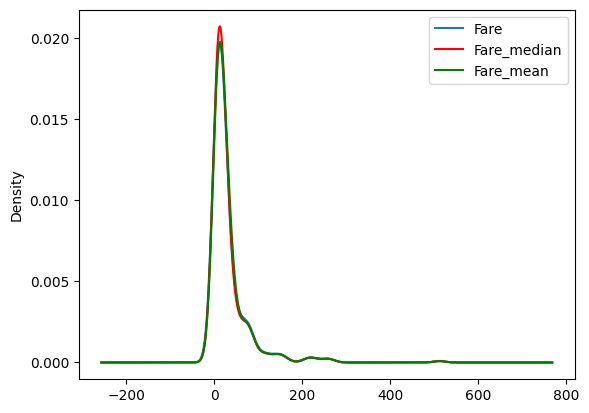

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [49]:
X_train.cov() #co variance

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,66.665205,204.349513,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,2448.197914,57.957599,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,16.385048,-5.112563,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,52.788341,161.812625,51.358000
Fare_mean,66.665205,2448.197914,16.385048,52.788341,2324.238526,55.023037,2324.238526
Age_median,204.349513,57.957599,-5.112563,161.812625,55.023037,161.989566,53.553455
Fare_median,64.858859,2448.197914,16.476305,51.358000,2324.238526,53.553455,2340.091022


In [50]:
X_train.corr()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,0.090156,1.000000,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,1.000000,0.091757,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,0.205499,-0.242883,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.086078,0.999454,0.083461
Fare_mean,0.090156,1.000000,0.205499,0.086078,1.000000,0.089673,0.996607
Age_median,1.000000,0.091757,-0.242883,0.999454,0.089673,1.000000,0.086982
Fare_median,0.087356,1.000000,0.205942,0.083461,0.996607,0.086982,1.000000


<Axes: >

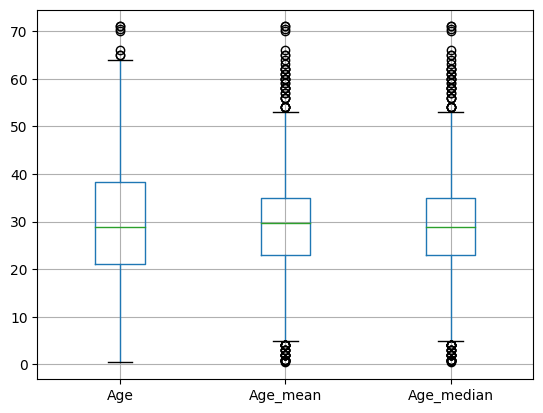

In [51]:
X_train[['Age' , 'Age_mean' , 'Age_median']].boxplot()

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [54]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [55]:
trf.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [56]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [57]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [58]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)